## 1. Data Processing & Clustering

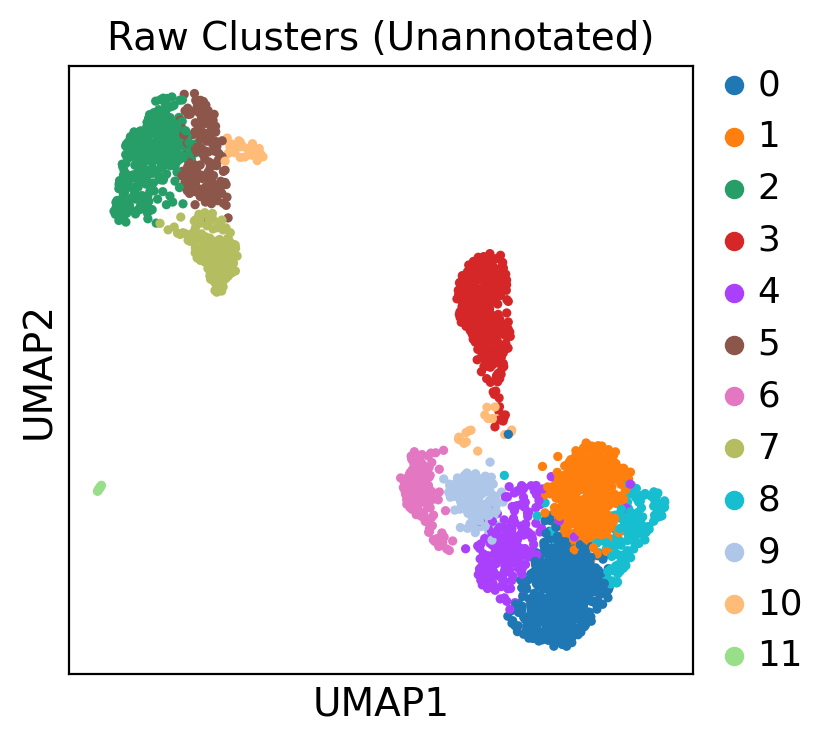

In [1]:
## 1. Data Processing & Clustering
import scanpy as sc
import os
import warnings

os.environ['LOKY_MAX_CPU_COUNT'] = '1'

sc.settings.set_figure_params(dpi=100, facecolor='white')
warnings.filterwarnings('ignore')

# 1. Load Data
user_home = os.path.expanduser("~")
file_path = "pbmc3k_raw.h5ad" 

if os.path.exists(file_path):
    adata = sc.read_h5ad(file_path)
else:
    adata = sc.datasets.pbmc3k()

# 2. Preprocessing Pipeline
adata.var_names_make_unique()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata, n_comps=50)

# 3. Clustering & Visualizing
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata)

# Plot the raw clusters
sc.pl.umap(adata, color='leiden', title="Raw Clusters (Unannotated)")

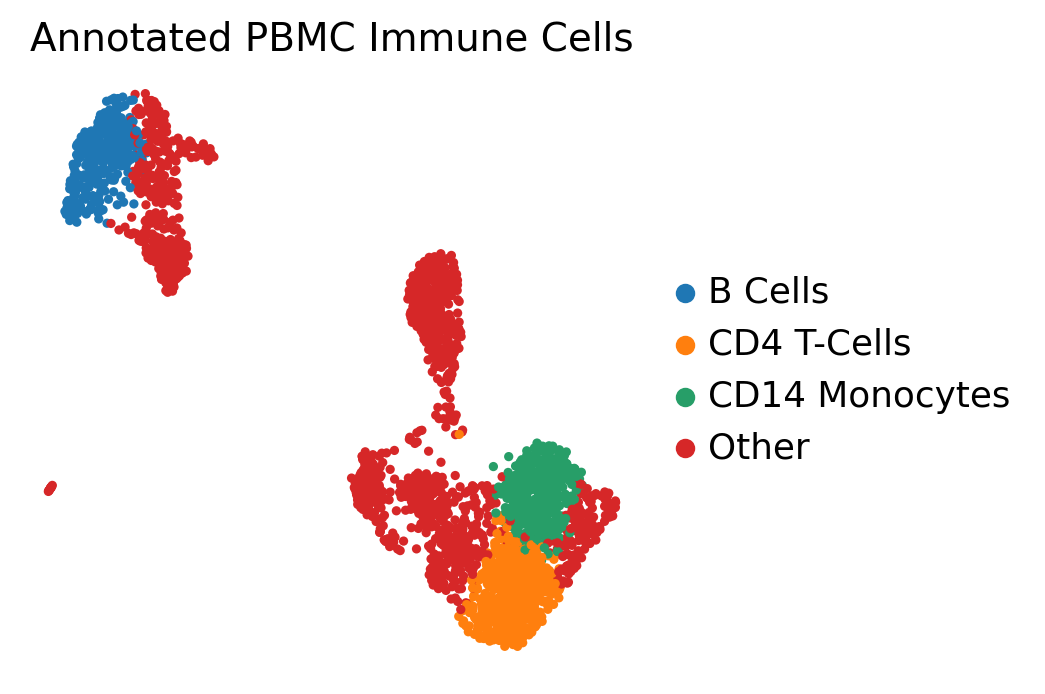

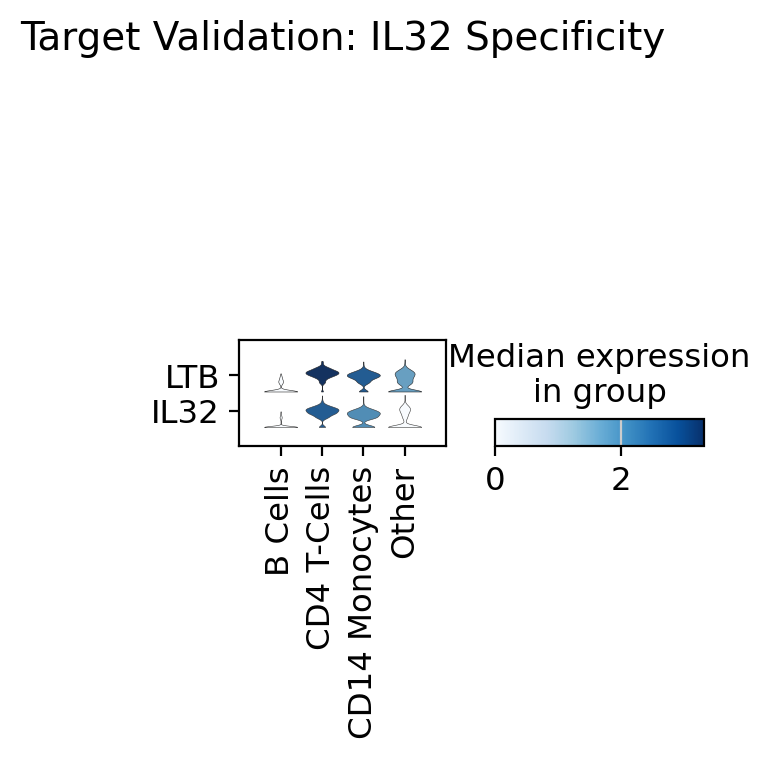

In [2]:
## 2. Cell Type Annotation & Target Identification
# 1. Annotate Clusters
new_names = {
    '0': 'CD4 T-Cells',
    '1': 'CD14 Monocytes', 
    '2': 'B Cells',
    '3': 'Other', '4': 'Other', '5': 'Other', '6': 'Other', 
    '7': 'Other', '8': 'Other', '9': 'Other', '10': 'Other', '11': 'Other'
}
adata.obs['cell_type'] = adata.obs['leiden'].map(new_names)

# 2. Visualisation
sc.pl.umap(adata, color='cell_type', title="Annotated PBMC Immune Cells", frameon=False, show=True)

# 3. Target Validation (Violin Plot)
sc.pl.stacked_violin(adata, ['LTB', 'IL32'], groupby='cell_type', swap_axes=True, title="Target Validation: IL32 Specificity", show=True)

## 2. Cell Type Annotation & Target Identification

In [3]:
## 3. Structural Analysis of Drug Target (IL-32)
from Bio.PDB import PDBParser
import urllib.request
import os

# 1. Fetch 3D Structure
pdb_id = "2R3C"
if not os.path.exists(f"{pdb_id}.pdb"):
    urllib.request.urlretrieve(f"https://files.rcsb.org/download/{pdb_id}.pdb", f"{pdb_id}.pdb")

# 2. Analyze Geometry
parser = PDBParser(QUIET=True)
structure = parser.get_structure("IL32", f"{pdb_id}.pdb")
chain = structure[0]['A']
atom_count = sum(1 for _ in chain.get_atoms())

print(f"--- Target Structure Analysis ---")
print(f"Protein: Interleukin-32 (Isoform Alpha)")
print(f"Structure ID: {pdb_id}")
print(f"Total Atoms for Interaction: {atom_count}")

--- Target Structure Analysis ---
Protein: Interleukin-32 (Isoform Alpha)
Structure ID: 2R3C
Total Atoms for Interaction: 473


## 3. Structural Analysis of Drug Target (IL-32)

--- Target Structure Analysis ---
Protein: Interleukin-32 (Isoform Alpha)
Structure ID: 2R3C
Total Atoms: 473
Center of Mass: (2.86, 4.54, -12.64)


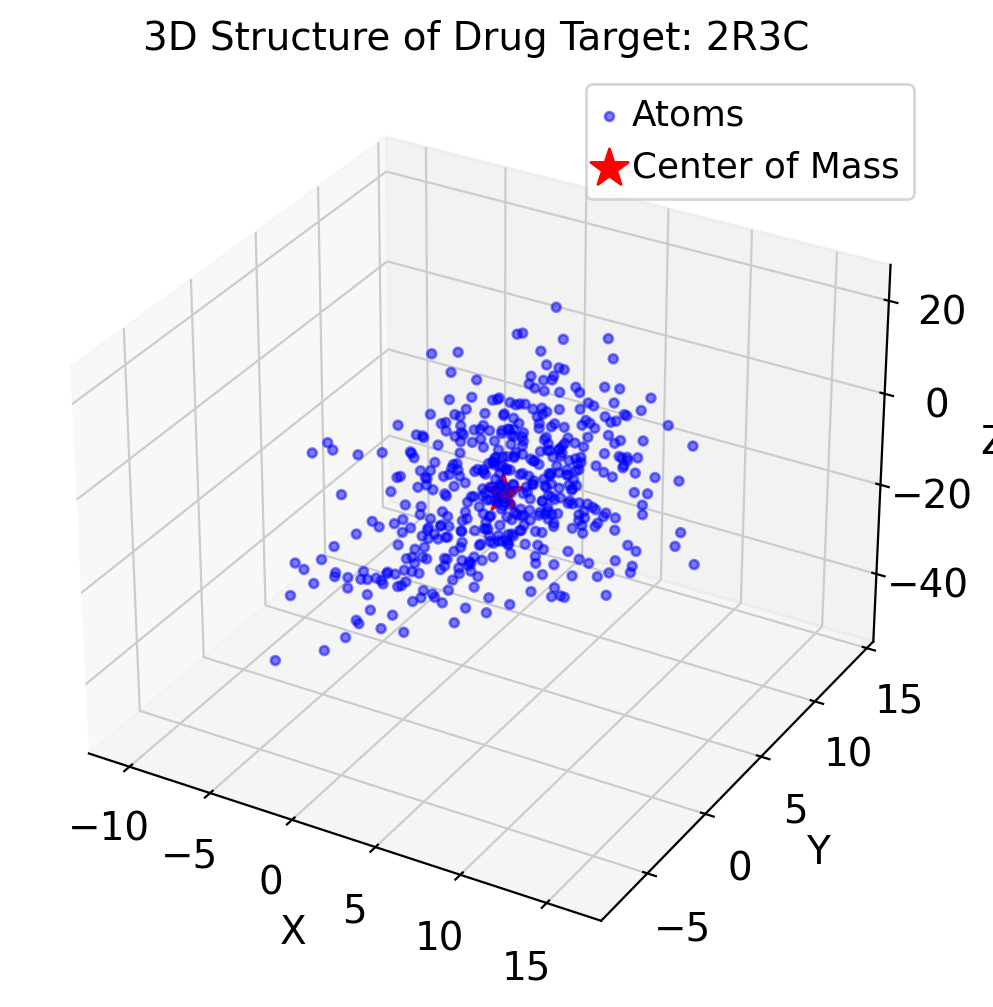

In [4]:
## 3. Structural Analysis of Drug Target (IL-32)
## 3. Structural Analysis of Drug Target (IL-32)
from Bio.PDB import PDBParser
import urllib.request
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Fetch 3D Structure
pdb_id = "2R3C"
if not os.path.exists(f"{pdb_id}.pdb"):
    urllib.request.urlretrieve(f"https://files.rcsb.org/download/{pdb_id}.pdb", f"{pdb_id}.pdb")

# 2. Parse the Structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("IL32", f"{pdb_id}.pdb")
chain = structure[0]['A']

# 3. Extract Atom Coordinates & Calculate Center
x_coords, y_coords, z_coords = [], [], []
x_sum, y_sum, z_sum = 0, 0, 0
count = 0

for residue in chain:
    for atom in residue:
        x, y, z = atom.get_coord()
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)
        x_sum += x
        y_sum += y
        z_sum += z
        count += 1

center_x = x_sum / count
center_y = y_sum / count
center_z = z_sum / count

print(f"--- Target Structure Analysis ---")
print(f"Protein: Interleukin-32 (Isoform Alpha)")
print(f"Structure ID: {pdb_id}")
print(f"Total Atoms: {count}")
print(f"Center of Mass: ({center_x:.2f}, {center_y:.2f}, {center_z:.2f})")

# 4. Generate 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot Atoms (Blue)
ax.scatter(x_coords, y_coords, z_coords, c='blue', s=10, alpha=0.5, label='Atoms')
# Plot Center (Red Star)
ax.scatter([center_x], [center_y], [center_z], c='red', s=200, marker='*', label='Center of Mass')

ax.set_title(f"3D Structure of Drug Target: {pdb_id}")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()